# Fourier Transform Image Processing

This notebook demonstrates various applications of Fourier Transform in image processing, including:

- Discrete Fourier Transform (DFT) of images
- Frequency domain filtering (Low-pass, High-pass, Band-pass, Band-stop)
- Different filter types (Ideal, Butterworth, Gaussian)
- Visualization of frequency domain representations

## Overview

The Fourier Transform is a mathematical technique that transforms a function from the spatial domain to the frequency domain. In image processing, it's used to analyze and manipulate images based on their frequency content.

## Dependencies

- OpenCV (cv2)
- NumPy
- Matplotlib
- urllib (for loading images from URLs)

## Author

Computer Vision DSAI 352 Assignment - Morphology and Fourier Transform

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display plots inline
%matplotlib inline

# Function to display images (replaces cv2_imshow for local use)
def show_image(image, title="Image", cmap='gray'):
    """Display image using matplotlib"""
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


## 1. Import Required Libraries

Import all necessary libraries for image processing and visualization.

In [2]:
def load_image(image_url):
    """Load image in grayscale"""
    resp = urllib.request.urlopen(image_url)
    image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
    return image

## 2. Utility Functions

Define helper functions for image loading and processing.

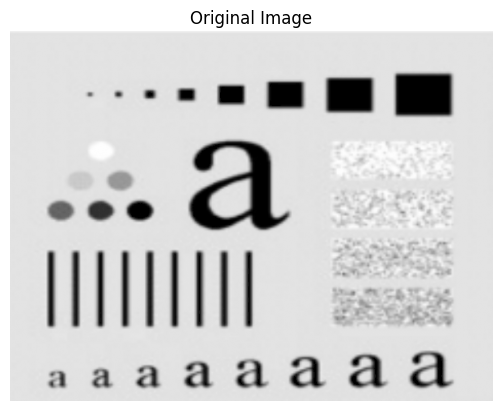

In [3]:
# Provide the image URL
image_url = "https://drive.google.com/uc?id=1PKCyYW9FWhsQUchwjSlwQYsmoSASdFSy"
image = load_image(image_url)

# Display Original Image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


## 3. Load and Display Test Image

Load a sample image from URL and display it for processing.

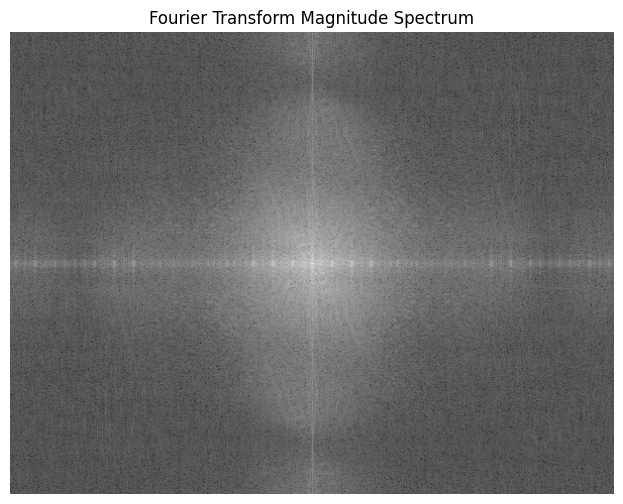

In [4]:
# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# Calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0], fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude spectrum
show_image(magnitude, "Fourier Transform Magnitude Spectrum")


## 4. Basic Fourier Transform

Compute and visualize the Discrete Fourier Transform of the image.

In [5]:
def apply_fourier_transform(image):
    """Compute the DFT and shift the zero-frequency component to the center"""
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)
    return dft_shifted

def inverse_fourier_transform(dft_shifted):
    """Reverse the Fourier transform and return the magnitude"""
    dft_shifted = np.fft.ifftshift(dft_shifted)  # Shift back
    img_back = cv2.idft(dft_shifted)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])  # Compute magnitude
    return cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)  # Normalize for display


def create_filter(shape, filter_type, d0=30, w=10):
    """
    Create various frequency filters in the frequency domain.
    - filter_type: 'lowpass', 'highpass', 'bandpass', 'bandstop'
    - d0: Cutoff frequency
    - w: Bandwidth for band filters
    """
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.float32)

    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow)**2 + (v - ccol)**2)  # Distance from center
            if filter_type == 'lowpass' and d <= d0:
                mask[u, v] = 1
            elif filter_type == 'highpass' and d > d0:
                mask[u, v] = 1
            elif filter_type == 'bandpass' and d0 - w / 2 <= d <= d0 + w / 2:
                mask[u, v] = 1
            elif filter_type == 'bandstop' and not (d0 - w / 2 <= d <= d0 + w / 2):
                mask[u, v] = 1

    return mask


## 5. Frequency Domain Filtering Functions

Define functions for applying Fourier transforms and creating various frequency filters.

## 6. Basic Filter Applications

Apply different types of frequency filters (Low-pass, High-pass, Band-pass, Band-stop) using the **create_filter** function.

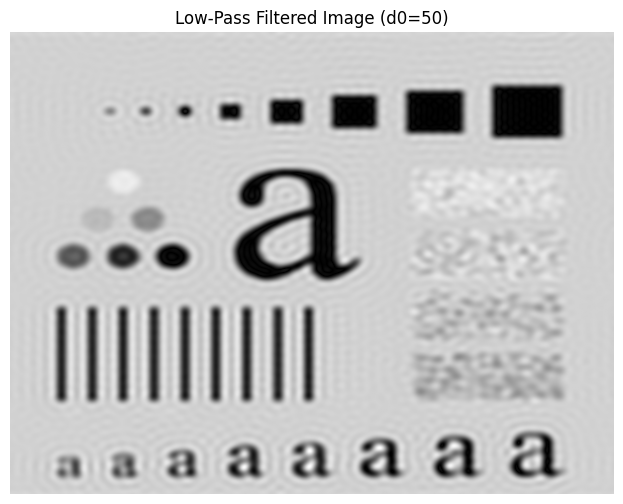

In [6]:
# Load image
path = "https://drive.google.com/uc?id=1PKCyYW9FWhsQUchwjSlwQYsmoSASdFSy"
image = load_image(path)

# Apply Fourier Transform
dft_shifted = apply_fourier_transform(image)

# Create Low-Pass Filter
lowpass_filter = create_filter(image.shape, 'lowpass', d0=50)

# Apply Filter
filtered_dft = dft_shifted * lowpass_filter

# Inverse Fourier Transform
img_lowpass = inverse_fourier_transform(filtered_dft)

# Display
show_image(img_lowpass, "Low-Pass Filtered Image (d0=50)")


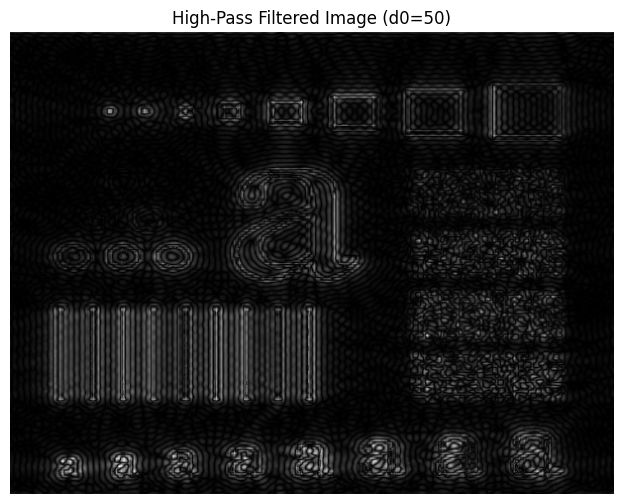

In [7]:
# Create High-Pass Filter
highpass_filter = create_filter(image.shape, 'highpass', d0=50)

# Apply Filter
filtered_dft = dft_shifted * highpass_filter

# Inverse Fourier Transform
img_highpass = inverse_fourier_transform(filtered_dft)

# Display
show_image(img_highpass, "High-Pass Filtered Image (d0=50)")


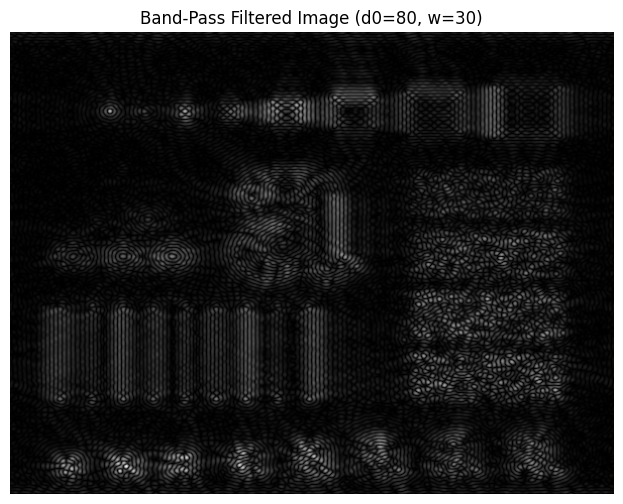

In [8]:
# Create Band-Pass Filter
bandpass_filter = create_filter(image.shape, 'bandpass', d0=80, w=30)

# Apply Filter
filtered_dft = dft_shifted * bandpass_filter

# Inverse Fourier Transform
img_bandpass = inverse_fourier_transform(filtered_dft)

# Display
show_image(img_bandpass, "Band-Pass Filtered Image (d0=80, w=30)")


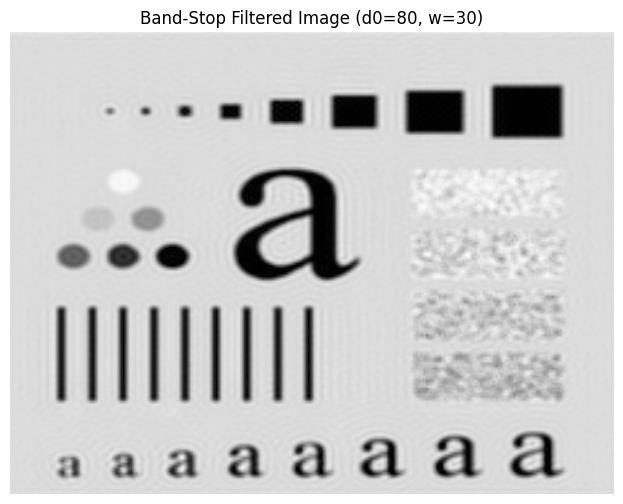

In [9]:
# Create Band-Stop Filter
bandstop_filter = create_filter(image.shape, 'bandstop', d0=80, w=30)

# Apply Filter
filtered_dft = dft_shifted * bandstop_filter

# Inverse Fourier Transform
img_bandstop = inverse_fourier_transform(filtered_dft)

# Display
show_image(img_bandstop, "Band-Stop Filtered Image (d0=80, w=30)")


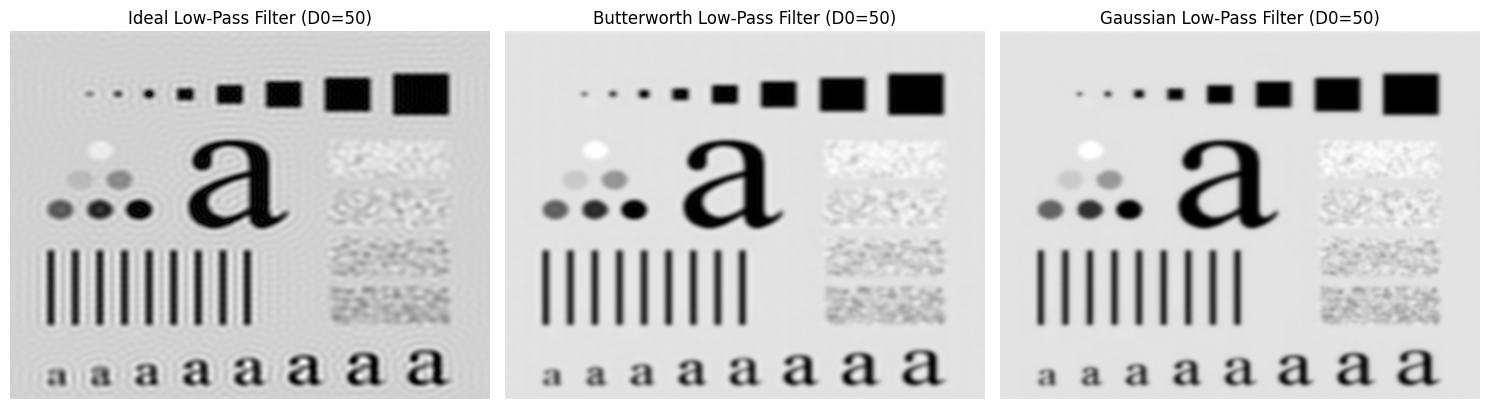

In [10]:
# Create Low-Pass Filters
def create_lowpass_filter(shape, filter_type, d0=30, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)  # Distance from center

            if filter_type == 'ideal':  # Ideal Low-Pass Filter
                mask[u, v] = 1 if d <= d0 else 0

            elif filter_type == 'butterworth':  # Butterworth Low-Pass Filter
                mask[u, v] = 1 / ( 1 + ( d / d0 ) ** ( 2 * order))

            elif filter_type == 'gaussian':  # Gaussian Low-Pass Filter
                mask[u, v] = np.exp(-( d**2 ) / (2*(d0**2) ))

    return mask


# Apply Fourier Transform
dft_shifted = apply_fourier_transform(image)

# Define filter types and frequency cutoff
filter_types = ['ideal', 'butterworth', 'gaussian']
d0 = 50  # Cutoff frequency

# Create figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Apply different low-pass filters and display results
for i, f_type in enumerate(filter_types):
    # Create Low-Pass Filter
    lowpass_filter = create_lowpass_filter(image.shape, f_type, d0=d0)

    # Apply Filter
    filtered_dft = dft_shifted * lowpass_filter[:, :, np.newaxis]  # Expand dimensions

    # Inverse Fourier Transform
    img_lowpass = inverse_fourier_transform(filtered_dft)

    # Display in subplot
    ax = axes[i]
    ax.imshow(img_lowpass, cmap='gray')
    ax.set_title(f'{f_type.capitalize()} Low-Pass Filter (D0={d0})')
    ax.axis('off')

# Show the figure
plt.tight_layout()
plt.show()


## 7. Advanced Filter Types Comparison

Compare different types of low-pass filters: Ideal, Butterworth, and Gaussian.

## 8. Improved Filter Implementation

Enhanced filter function with support for both low-pass and high-pass filters.

### Target Output

The following plot shows the comparison between low-pass and high-pass filters using different filter types:

![Filter Comparison](
    https://drive.google.com/uc?id=1Ryif1rOhK2JVY70iw600_ha3geEzhIfP)


In [11]:
# Write the updated function here
def create_filter(shape,filter_type,cut_off_frequency,order = 0,highpass = False):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)

    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)  # Distance from center

            if filter_type == 'ideal':  # Ideal Low-Pass Filter
                mask[u, v] = 1 if d <= cut_off_frequency else 0

            elif filter_type == 'butterworth':  # Butterworth Low-Pass Filter
                mask[u, v] = 1 / ( 1 + ( d / cut_off_frequency ) ** ( 2 * order))

            elif filter_type == 'gaussian':  # Gaussian Low-Pass Filter
                mask[u, v] = np.exp(-( d**2 ) / (2*(cut_off_frequency**2) ))
    if highpass:
      return (1 - mask)
    return mask

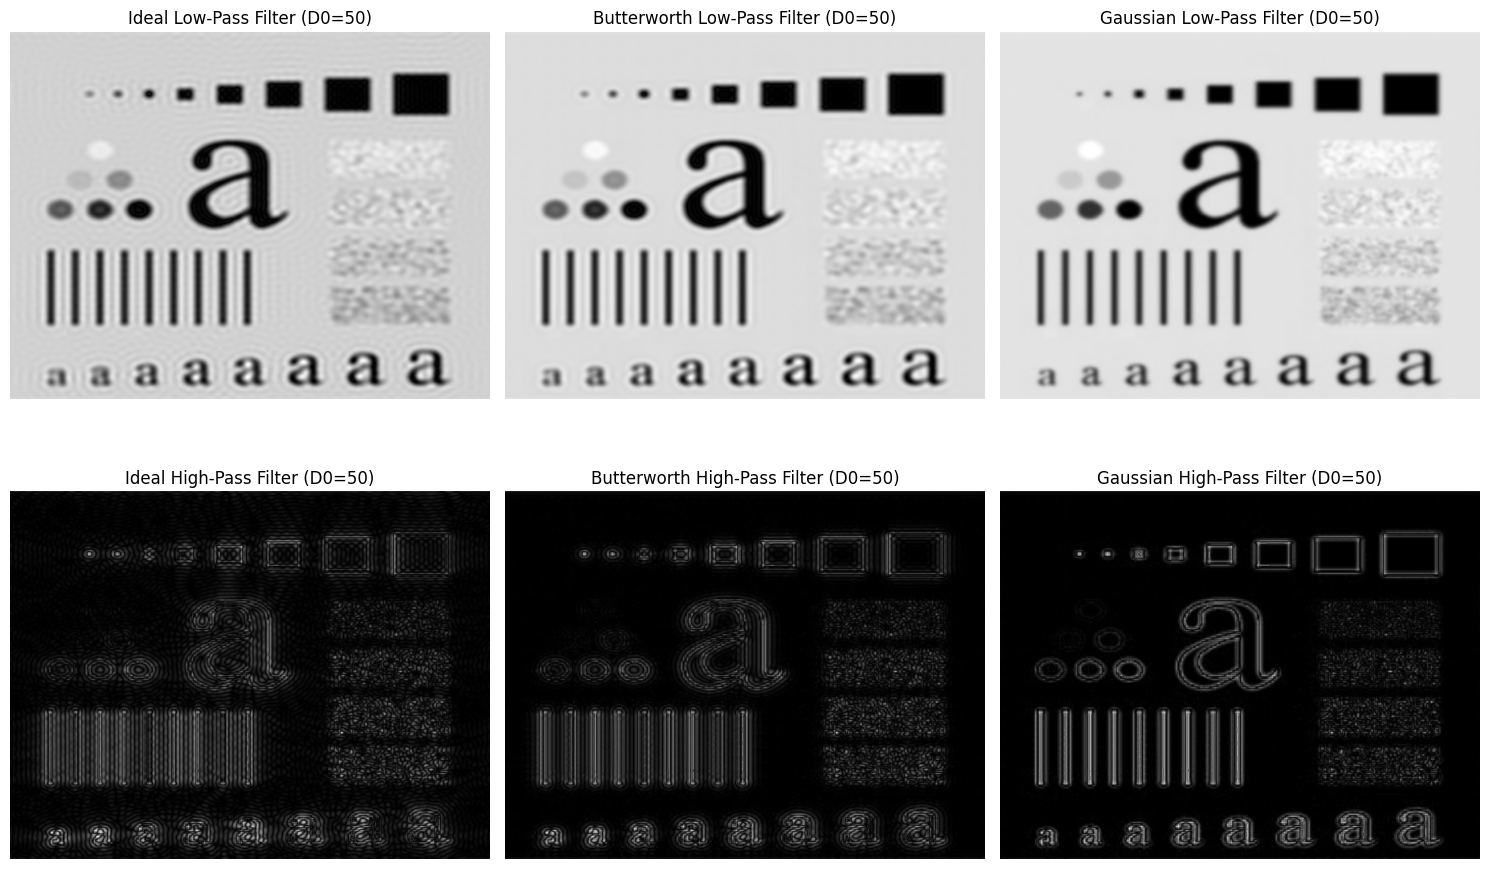

In [12]:
# Apply Fourier Transform
dft_shifted = apply_fourier_transform(image)

# Define filter types and frequency cutoff
filter_types = ['ideal', 'butterworth', 'gaussian']
d0 = 50  # Cutoff frequency
order = 5
# Create figure for Low-Pass and High-Pass filters
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Apply filters and display results
for i, f_type in enumerate(filter_types):
    # Low-Pass Filter
    lowpass_filter = create_filter(image.shape, f_type,cut_off_frequency=d0,order=order,highpass=False)
    filtered_dft_low = dft_shifted * lowpass_filter[:, :, np.newaxis]  # Expanding to match shape

    img_lowpass = inverse_fourier_transform(filtered_dft_low)

    # High-Pass Filter
    highpass_filter = create_filter(image.shape, f_type, cut_off_frequency=d0, order=order,highpass=True)
    filtered_dft_high = dft_shifted * highpass_filter[:, :, np.newaxis]  # Expanding to match shape

    img_highpass = inverse_fourier_transform(filtered_dft_high)

    # Display Low-Pass Filter Result
    axes[0, i].imshow(img_lowpass, cmap='gray')
    axes[0, i].set_title(f'{f_type.capitalize()} Low-Pass Filter (D0={d0})')
    axes[0, i].axis('off')

    # Display High-Pass Filter Result
    axes[1, i].imshow(img_highpass, cmap='gray')
    axes[1, i].set_title(f'{f_type.capitalize()} High-Pass Filter (D0={d0})')
    axes[1, i].axis('off')

# Show the figure
plt.tight_layout()
plt.show()

## 10. Conclusion

This notebook demonstrated various applications of Fourier Transform in image processing:

1. **Basic Fourier Transform**: Converting images from spatial to frequency domain
2. **Frequency Filtering**: Applying low-pass, high-pass, band-pass, and band-stop filters
3. **Filter Types**: Comparing Ideal, Butterworth, and Gaussian filters
4. **Practical Applications**: Understanding how different filters affect image content

### Key Observations:

- **Low-pass filters** remove high-frequency components (noise, edges), resulting in smoother images
- **High-pass filters** enhance edges and details by removing low-frequency components
- **Gaussian filters** provide the smoothest transitions compared to Ideal and Butterworth filters
- **Butterworth filters** offer a good compromise between sharpness and smoothness

### Further Applications:

- Image denoising
- Edge detection
- Image enhancement
- Pattern recognition
- Medical image processing